# Assignment

1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

## Part 1

Generate a word cloud based on the raw corpus

In [47]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from IPython.display import Image, display
data = pd.read_csv('hillary-clinton-emails/emails.csv')
data.ix[:,:8].head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00


In [48]:
data.ix[:,8:].head()

,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


### Trial 1) - Rawy Extracted Subject and ExtractedBodyText 

Let's only keep the text which is relevant for the raw body corpus, which is: ExtractedSubject and ExtractedBodyText, which encompass most of what the message should be about.

In [49]:
data_cut = data[['ExtractedSubject','ExtractedBodyText']].copy()
data_cut

,ExtractedSubject,ExtractedBodyText
0,FW: Wow,NaN
1,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Re: Chris Stevens,Thx
3,FVV: Cairo Condemnation - Final,NaN
4,NaN,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
6,"FW: Anti-Muslim film director in hiding, follo...",NaN
7,NaN,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
8,FVV: Secretary's remarks,FYI
9,more on Libya,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd..."


In [50]:
data_csv = data_cut.to_csv()

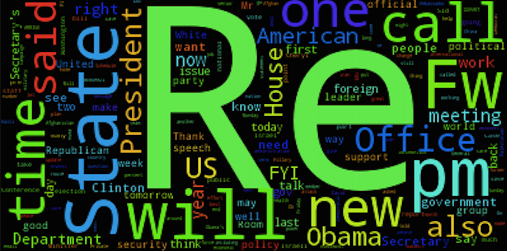

In [51]:
# Credit to - https://github.com/amueller/word_cloud/blob/master/examples/simple.py

# Make the wordcloud
wordcloud = WordCloud().generate(data_csv)
image = wordcloud.to_image()
display(Image('image_raw.png'))
#image.show()

From here, it's clear that words such as Re, Fw, pm (i.e. referring to time), which are not related to the content of the text itself but rather deal with email processing, are disproportiate in the full picture and should be taken out.

## Part 2

a) implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.)

In [52]:
import re
import nltk

## a) Tokenization

The pirpose of tokenization is to chop up long strings into individual words or symbols. This allows for further processing of the words.

In [67]:
from nltk import word_tokenize
data_clean = data_cut.replace(np.nan,' ', regex=True)

In [55]:
data_clean['tokenized_subj'] = data_clean.apply(lambda row: nltk.word_tokenize(row['ExtractedSubject']), axis=1)
data_clean['tokenized_sents'] = data_clean.apply(lambda row: nltk.word_tokenize(row['ExtractedBodyText']), axis=1)
data_clean

,ExtractedSubject,ExtractedBodyText,tokenized_subj,tokenized_sents
0,FW: Wow,,"[FW, :, Wow]",[]
1,,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",[],"[B6, Thursday, ,, March, 3, ,, 2011, 9:45, PM,..."
2,Re: Chris Stevens,Thx,"[Re, :, Chris, Stevens]",[Thx]
3,FVV: Cairo Condemnation - Final,,"[FVV, :, Cairo, Condemnation, -, Final]",[]
4,,"H <hrod17@clintonemail.com>\nFriday, March 11,...",[],"[H, <, hrod17, @, clintonemail.com, >, Friday,..."
5,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,"[Meet, The, Right, Wing, Extremist, Behind, An...","[Pis, print, ., -•-, ..., -^, H, <, hrod17, @,..."
6,"FW: Anti-Muslim film director in hiding, follo...",,"[FW, :, Anti-Muslim, film, director, in, hidin...",[]
7,,"H <hrod17@clintonemail.corn>\nFriday, March 11...",[],"[H, <, hrod17, @, clintonemail.corn, >, Friday..."
8,FVV: Secretary's remarks,FYI,"[FVV, :, Secretary, 's, remarks]",[FYI]
9,more on Libya,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...","[more, on, Libya]","[B6, Wednesday, ,, September, 12, ,, 2012, 6:1..."


You can now see that the sentences / subject lines are broken up into words (or symbols) within a list, which we can now use to check for stopworkds.

## b) Removing Stopwords 

Let's see what are the stopwords that are in the nltk database that we can remove. 

In [56]:
from nltk.corpus import stopwords # Import the stop word list
stop = stopwords.words('english')
print(stopwords.words("english") )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

As a reference to check whether the stopwords have been removed is line 15, where there is "your".

In [57]:
# Remove stop words from "words"
data_clean2 = data_clean
data_clean2['tokenized_subj'] = data_clean2['tokenized_subj'].apply(lambda x: [item for item in x if item not in stop])
data_clean2['tokenized_sents'] = data_clean2['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
data_clean2

,ExtractedSubject,ExtractedBodyText,tokenized_subj,tokenized_sents
0,FW: Wow,,"[FW, :, Wow]",[]
1,,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",[],"[B6, Thursday, ,, March, 3, ,, 2011, 9:45, PM,..."
2,Re: Chris Stevens,Thx,"[Re, :, Chris, Stevens]",[Thx]
3,FVV: Cairo Condemnation - Final,,"[FVV, :, Cairo, Condemnation, -, Final]",[]
4,,"H <hrod17@clintonemail.com>\nFriday, March 11,...",[],"[H, <, hrod17, @, clintonemail.com, >, Friday,..."
5,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,"[Meet, The, Right, Wing, Extremist, Behind, An...","[Pis, print, ., -•-, ..., -^, H, <, hrod17, @,..."
6,"FW: Anti-Muslim film director in hiding, follo...",,"[FW, :, Anti-Muslim, film, director, hiding, ,...",[]
7,,"H <hrod17@clintonemail.corn>\nFriday, March 11...",[],"[H, <, hrod17, @, clintonemail.corn, >, Friday..."
8,FVV: Secretary's remarks,FYI,"[FVV, :, Secretary, 's, remarks]",[FYI]
9,more on Libya,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",[Libya],"[B6, Wednesday, ,, September, 12, ,, 2012, 6:1..."


You can see that the stopword in line 15 is now gone, so we are set!

### c) stemming

We need to change the words into more standard forms to reduce the inflectual forms.

In [66]:
data_clean3 = data_clean2
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [65]:
for w in data_clean3[["tokenized_subj"]]:
    stemmer.stem(w)
    
for w in data_clean3[["tokenized_sents"]]:
    stemmer.stem(w)

data_clean3

,ExtractedSubject,ExtractedBodyText,tokenized_subj,tokenized_sents
0,FW: Wow,,"[FW, :, Wow]",[]
1,,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",[],"[B6, Thursday, ,, March, 3, ,, 2011, 9:45, PM,..."
2,Re: Chris Stevens,Thx,"[Re, :, Chris, Stevens]",[Thx]
3,FVV: Cairo Condemnation - Final,,"[FVV, :, Cairo, Condemnation, -, Final]",[]
4,,"H <hrod17@clintonemail.com>\nFriday, March 11,...",[],"[H, <, hrod17, @, clintonemail.com, >, Friday,..."
5,Meet The Right Wing Extremist Behind Anti-Musl...,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,"[Meet, The, Right, Wing, Extremist, Behind, An...","[Pis, print, ., -•-, ..., -^, H, <, hrod17, @,..."
6,"FW: Anti-Muslim film director in hiding, follo...",,"[FW, :, Anti-Muslim, film, director, hiding, ,...",[]
7,,"H <hrod17@clintonemail.corn>\nFriday, March 11...",[],"[H, <, hrod17, @, clintonemail.corn, >, Friday..."
8,FVV: Secretary's remarks,FYI,"[FVV, :, Secretary, 's, remarks]",[FYI]
9,more on Libya,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",[Libya],"[B6, Wednesday, ,, September, 12, ,, 2012, 6:1..."


### d) generate a new word cloud

In [14]:
type (data_csv_new)

list

In [13]:
wordcloud = WordCloud().generate(data_csv_new)
image = wordcloud.to_data_csv_newimage()
#display(Image('image_raw.png'))
image.show()

TypeError: expected string or bytes-like object

## Discussion 